<a href="https://colab.research.google.com/github/nephylum/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS9_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

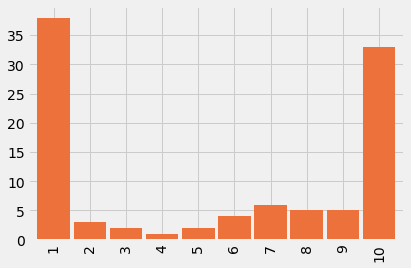

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))
fake.plot.bar(color='#ED713A', width=0.9)
plt.show()

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#Since we know the values we want from the dataset, I'll put them in end_data
end_data = pd.Series([df['1_pct'][80052], df['2_pct'][80052], 
                      df['3_pct'][80052], df['4_pct'][80052], 
                      df['5_pct'][80052], df['6_pct'][80052],
                      df['7_pct'][80052], df['8_pct'][80052], 
                      df['9_pct'][80052], df['10_pct'][80052]], 
                     index=range(1,11))

end_data


1     38.4
2      2.6
3      1.4
4      0.9
5      2.1
6      4.1
7      5.8
8      5.5
9      5.5
10    33.7
dtype: float64

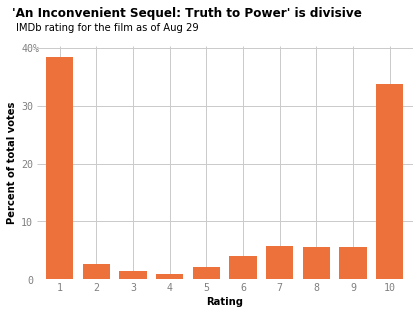

In [0]:
fig, ax = plt.subplots()

end_data.plot.bar(color='#ED713A', width=0.75)
ax.set_facecolor('white')
fig.set_facecolor('white')

ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, x=0.4, y=1.1,fontweight='demibold')
ax.text(s='IMDb rating for the film as of Aug 29', x=-1.2, y=43, fontsize=10)
plt.xticks(rotation=0, fontsize=10, color='gray', fontfamily='monospace')
plt.yticks(fontsize=10, color='gray', fontfamily='monospace')
ax.set_xlabel('Rating', fontsize = 10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.text(s='%', x=-.72,y=39.4, fontsize=10, color='gray', fontfamily='monospace')
plt.show()

In [0]:
display(example)

###Working with FiveThirtyEight's 'Ultimate Halloween Candy Power Ranking' dataset.

In [168]:
!wget https://github.com/fivethirtyeight/data/raw/master/comic-characters/dc-wikia-data.csv
!wget https://github.com/fivethirtyeight/data/raw/master/comic-characters/marvel-wikia-data.csv

--2019-10-03 22:32:17--  https://github.com/fivethirtyeight/data/raw/master/comic-characters/dc-wikia-data.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv [following]
--2019-10-03 22:32:17--  https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1105600 (1.1M) [text/plain]
Saving to: ‘dc-wikia-data.csv’

dc-wikia-data.csv   100%[===================>]   1.05M  --.-KB/s    in 0.07s   

2019-10-03 22:32:17 (14.1 MB/s) - ‘dc-wikia-data.csv’ saved [1

In [169]:
mdf = pd.read_csv('marvel-wikia-data.csv')
dcdf = pd.read_csv('dc-wikia-data.csv')
print(mdf.shape)
mdf.head()

(16376, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [170]:
print(dcdf.shape)
dcdf.head()

(6896, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [183]:
dcdf.tail(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6886,289378,Bedivere (New Earth),\/wiki\/Bedivere_(New_Earth),NaN,NaN,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"1936, February",1936.0
6887,283661,Herbert Hoover (New Earth),\/wiki\/Herbert_Hoover_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6888,283657,William Howard Taft (New Earth),\/wiki\/William_Howard_Taft_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6889,21655,Frank Fitzsimmons (New Earth),\/wiki\/Frank_Fitzsimmons_(New_Earth),Public Identity,Good Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6890,283482,James Garfield (New Earth),\/wiki\/James_Garfield_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [196]:
#looks like we have some null values 'YEAR'
dcdf['YEAR'].value_counts()

2006.0    303
1988.0    286
2010.0    279
1989.0    266
1987.0    254
1994.0    230
2009.0    226
2008.0    211
1993.0    209
1997.0    189
1996.0    188
2007.0    188
1999.0    179
1992.0    178
1990.0    175
1995.0    172
1983.0    161
2005.0    159
2011.0    155
2000.0    152
1991.0    145
1998.0    143
1984.0    141
1986.0    132
1981.0    119
2002.0    115
1985.0    115
1982.0    111
2003.0    103
2004.0    102
         ... 
1959.0     34
1964.0     31
1979.0     29
1970.0     28
1969.0     23
1947.0     20
1973.0     20
1948.0     20
1939.0     18
1974.0     17
1958.0     15
1944.0     15
1943.0     14
1957.0     13
1956.0     13
1951.0     12
1955.0     12
1938.0     10
1946.0      9
1936.0      9
1950.0      9
1945.0      7
1954.0      7
1949.0      6
2012.0      5
1952.0      5
1937.0      4
1935.0      1
1953.0      1
2013.0      1
Name: YEAR, Length: 79, dtype: int64

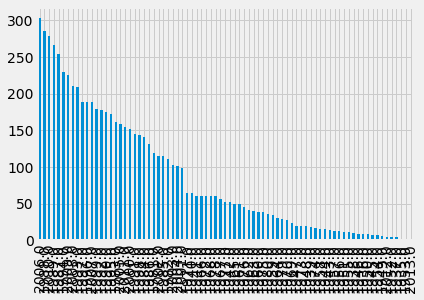

In [193]:
fig, ax = plt.subplots()
dcdf['YEAR'].value_counts().plot.bar()
plt.show()

In [172]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/10/hickey-feature-comics-11.png?w=575'
example2 = Image(url=url, width=400)

#the graph I'd like to replicate
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here